# 001305974_HEMANTJAIN_&&_001342989_SAGARSHAH_ASSIGNMENT_4

Dataset link: https://www.mldata.io/dataset-details/abalone/#customize_download

**Predict age of abalone from physical measurements**

An abalone is an edible mollusk of warm seas that has a shallow ear-shaped shell lined with mother-of-pearl and pierced with respiratory holes.

This dataset helps you predict the age of this mollusk.

**Attribute Details**: Name Type Description sex string M, F, and I(infant) length float Longest shell measurement (mm) diameter float Perpendicular to length (mm) height float With meat in chell (mm) whole_weight float Whole abalone (grams) shucked_weight float Weight of meat (grams) viscera_weight float Gut weight: after bleeding (grams) shell_weight float After being dried (grams) rings integer Predictor: continuous from 1-29 except 28

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.
Original file in: https://archive.ics.uci.edu/ml/datasets/abalone

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
dbs=pd.read_csv('data2/abalone.csv',index_col=0,na_values='NA', delim_whitespace=False)

In [9]:
dbs.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
dbs.empty

False

In [11]:
dbs.dropna()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
3,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
2,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
2,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
1,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9


**Maximum likelihood estimation (MLE)** fitting is usually more work than the method of moments, but is preferred as the resulting estimator is known to have good theoretical properties.

MLE is a method of estimating the parameters of a statistical model, given observations. MLE attempts to find the parameter values that maximize the likelihood function, given the observations.

MLE accomplishes this by taking the mean and variance as parameters, and finding values for these parameters that make the observed results (the subset) the most probable given the normal model. The analysis is an iterative one, which proceeds until a metric called the log likelihood converges

In [12]:
from scipy.special import psi, polygamma

dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [13]:
#Calculate statistics
log_mean = dbs.mean().apply(np.log)
mean_log = dbs.apply(np.log).mean()

In [14]:
from scipy.optimize import newton
# Alpha MLE for Rings
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

10.113528445930784

In [25]:

# Beta MLE for Rings
beta_mle = alpha_mle/dbs.mean()[-1]
beta_mle

1.0181044590329185

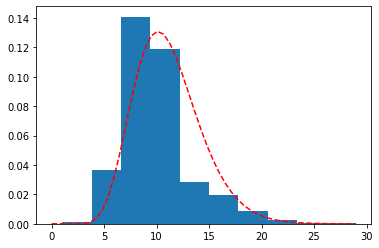

In [26]:
from scipy.stats.distributions import gamma
dec = dbs.Rings
dec.hist(normed=True, bins=10, grid=False)
x = np.linspace(0, dec.max())
plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--')

The red dotted curve is a better model of our data than the continuous mauve curve. So MLE gives us better models than MOM.

We also tried the **Exponential Distribution** method which overfits the dataset.Hence,MLE is the best.

For common distributions, SciPy includes methods for fitting via MLE:

In [27]:
from scipy.stats import gamma

gamma.fit(dbs.Rings)

(9.548416331363981, 0.26282636600537074, 1.0128229480241906)